In [1]:
'''

Use this to learn pandas and machine learning.

Based on 
https://www.kaggle.com/omarelgabry/rossmann-store-sales/a-journey-through-rossmann-stores

Things I've learned:

- Manipulate a column of a dataframe
-- comparision
-- cast
-- apply lambda function

- group by

- Use sns to draw charts

'''

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import xgboost as xgb

from IPython.display import display
from pandas import DataFrame, Series

/Applications/anaconda/envs/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Data Loading and Preprocessing

In [3]:
rossmann_df  = pd.read_csv("input/train.csv")
store_df     = pd.read_csv("input/store.csv")
test_df      = pd.read_csv("input/test.csv")

# Map string features to integers
# This map function is very convienient
rossmann_df["StateHoliday"] = rossmann_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 2, "c": 3})
test_df["StateHoliday"]     = test_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 2, "c": 3})

# Create Year and Month columns
rossmann_df['Year']  = rossmann_df['Date'].apply(lambda x: int(str(x)[:4]))
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: int(str(x)[5:7]))

test_df['Year']  = test_df['Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Date'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization

rossmann_df.rename(columns={"Date":"Time"}, inplace=True)
test_df.rename(columns={"Date":"Time"}, inplace=True)
rossmann_df['Date'] = rossmann_df['Time'].apply(lambda x: (str(x)[:7]))
test_df['Date']     = test_df['Time'].apply(lambda x: (str(x)[:7]))


/Applications/anaconda/envs/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
display(rossmann_df.head())

# Some additional info
# rossmann_df.info()
# print("----------------------------")
# store_df.info()
# print("----------------------------")
# test_df.info()

,Store,DayOfWeek,Time,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Date
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,2015-07
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,2015-07
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,2015-07
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,2015-07
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,2015-07


In [26]:
display(store_df.head())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


### Explore the Test File

In [11]:
# What is the length of the prediction period?

display(test_df.head())
display(test_df.tail())

# We can see that there are roughly six weeks.

,Id,Store,DayOfWeek,Time,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Date
0,1,1,4,2015-09-17,1,1,0,0,2015,9,2015-09
1,2,3,4,2015-09-17,1,1,0,0,2015,9,2015-09
2,3,7,4,2015-09-17,1,1,0,0,2015,9,2015-09
3,4,8,4,2015-09-17,1,1,0,0,2015,9,2015-09
4,5,9,4,2015-09-17,1,1,0,0,2015,9,2015-09


,Id,Store,DayOfWeek,Time,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Date
41083,41084,1111,6,2015-08-01,1,0,0,0,2015,8,2015-08
41084,41085,1112,6,2015-08-01,1,0,0,0,2015,8,2015-08
41085,41086,1113,6,2015-08-01,1,0,0,0,2015,8,2015-08
41086,41087,1114,6,2015-08-01,1,0,0,0,2015,8,2015-08
41087,41088,1115,6,2015-08-01,1,0,0,1,2015,8,2015-08


## Explore Each Feature

### Open Count

In most cases, the shops are closed on Sunday and open for the rest.

Instances of opening on Sunday:
3593
       count
Store       
85       134
122       90
209       87
259      133
262      134
274      133
299       86
310      102
335      134
353      133
423      134
433       71
453       92
494      134
512      106
524       86
530      106
562      134
578      106
676      131
682      134
732       88
733      134
769      134
863       92
867       85
877       22
931       80
948      132
1045      88
1081     108
1097     134
1099      96


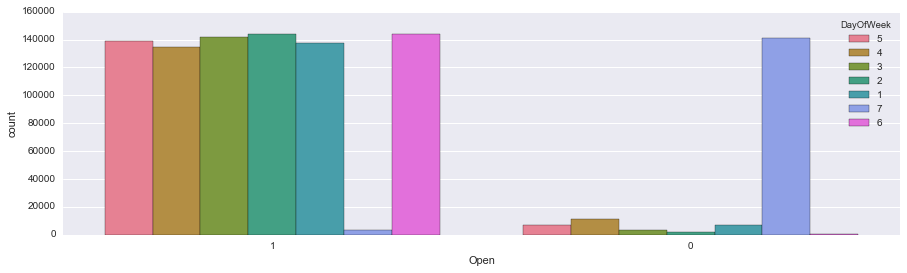

In [25]:
# Open
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=rossmann_df, palette="husl", ax=axis1)

# Some stores opened on Sunday.
print("Instances of opening on Sunday:")
print(rossmann_df.loc[rossmann_df['Open'] == 1].loc[rossmann_df['DayOfWeek'] == 7]["Store"].count())

# List of stores that open on Sunday.
# Why they open? Holiday? 
# - Well, it seems that they always open on Sunday.
# Will they affect the test?
# - Seems not.
print(rossmann_df.loc[rossmann_df['Open'] == 1].loc[rossmann_df['DayOfWeek'] == 7] \
                                               .groupby(["Store"])["Store"].agg(["count"]))



# fill NaN values in test_df with Open=1 if DayOfWeek != 7
# It seems that this code does not have an effect.
# test_df["Open"][test_df["Open"] != test_df["Open"]] = (test_df["DayOfWeek"] != 7).astype(int)

# How to understand the above code?
# The equivalent could be:
# s = test_df["Open"][np.isnan(test_df["Open"])]

# Similarly:
#s = test_df["DayOfWeek"] != 7
#s[s == False]

### Monthly Sales and Customers


Observations:

- At the monthly level, the sales number seems to have periodicity. Can the machine learning model capture it?

- The sales trend and customer trend are highly correlated.

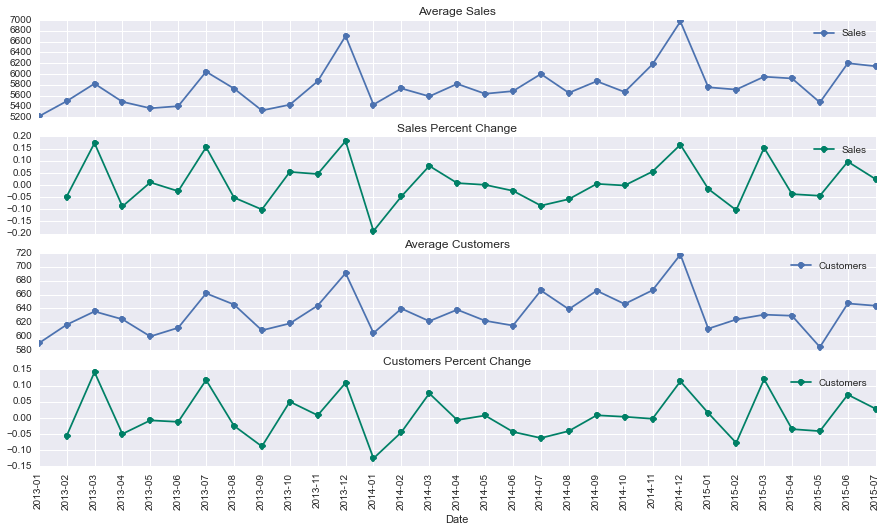

In [40]:



fig, axes = plt.subplots(4,1,sharex=True,figsize=(15,8))

i = 0

for feature in ["Sales", "Customers"]:

    # group by date and get average sales, and precent change
    average    = rossmann_df.groupby('Date')[feature].mean()
    pct_change = rossmann_df.groupby('Date')[feature].sum().pct_change()

    

    # plot average sales over time(year-month)
    axes[i] = average.plot(legend=True, ax=axes[i], marker='o', title="Average " + feature)
    axes[i].set_xticks(range(len(average)))
    axes[i].set_xticklabels(average.index.tolist(), rotation=90)
    i += 1
    
    # plot precent change for sales over time(year-month)
    axes[i] = pct_change.plot(legend=True, ax=axes[i], marker='o', rot=90,
                          colormap="summer", title=feature + " Percent Change")
    # ax2.set_xticks(range(len(pct_change_sales)))
    # ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)
    i += 1


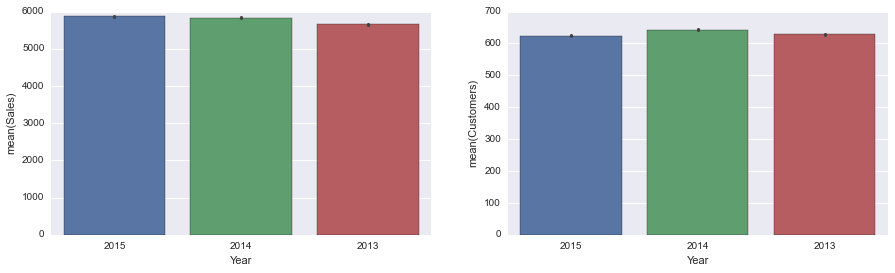

In [36]:
# .... contiune with Date

# Plot average sales & customers for every year
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Year', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='Year', y='Customers', data=rossmann_df, ax=axis2)

# Drop Date column
# rossmann_df.drop(['Date'], axis=1,inplace=True)
# test_df.drop(['Date'], axis=1,inplace=True)

### Customers

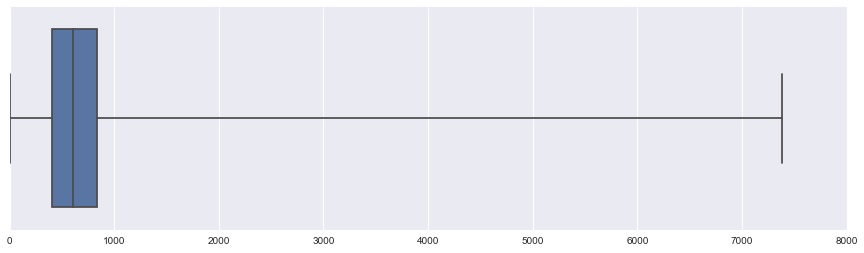

In [43]:

fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot([rossmann_df["Customers"]], whis=np.inf, ax=axis1)

## Sales

Pretty normally distributed

C:\Users\rvlfl_000\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


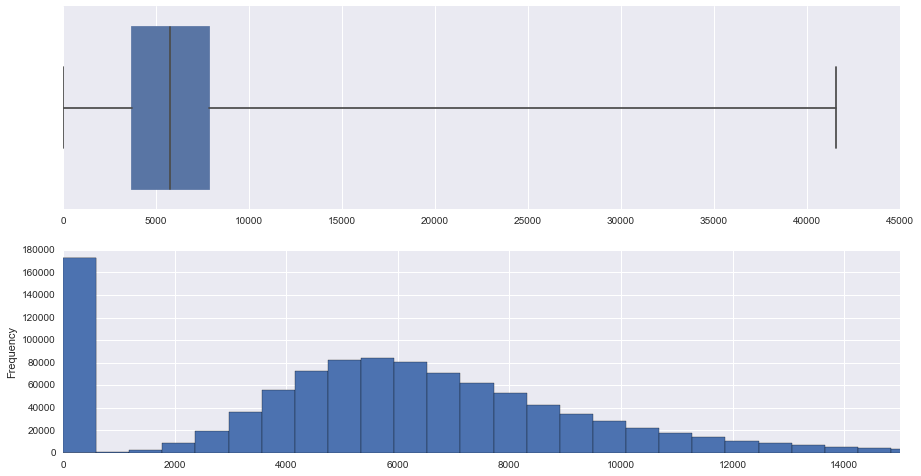

In [25]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,8))

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot([rossmann_df["Sales"]], whis=np.inf, ax=axis1)

rossmann_df["Sales"].plot(kind = "hist", bins=70, xlim = (0, 15000), ax = axis2)

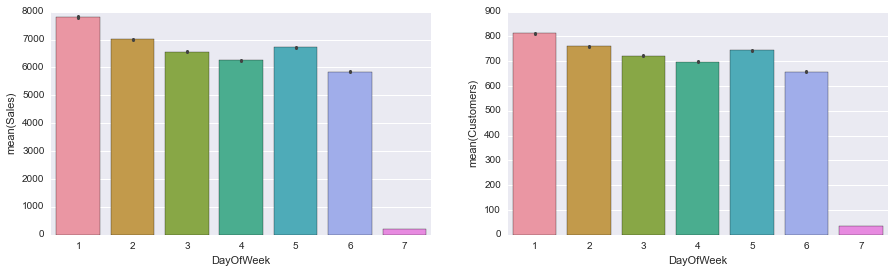

In [44]:
# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=rossmann_df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=rossmann_df, order=[1,2,3,4,5,6,7], ax=axis2)

### Sales Trend of Individual Stores

From store 7's data, we can see periodicity at the monthly level. Usually, July, August and December will have much higher sells. Can random forest capture it?

Store 1's trend is very different from store 7.

TODO: Think about how to turn the month into features.

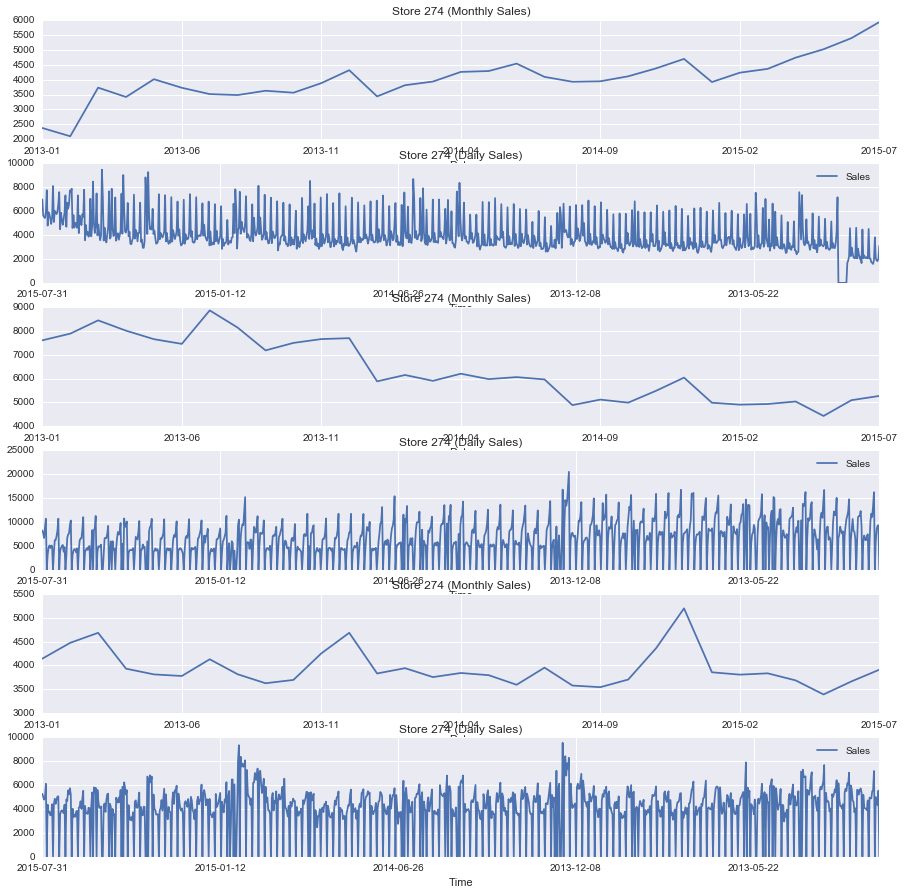

In [12]:

# Store 274 is an outlier, it rises sharply overtime.
stores = [274, 1086, 1]

# 1086 has a decreasing trend
fig, axes = plt.subplots(len(stores) * 2,1,sharex=False,figsize=(15,len(stores) * 5))

for i in range(0, len(stores)):

    rossmann_df.loc[rossmann_df["Store"] == stores[i]].groupby('Date')["Sales"].mean().plot(ax = axes[i * 2],
                                                                                           title="Store " + str(store1) + " (Monthly Sales)")

    rossmann_df.loc[rossmann_df["Store"] == stores[i]].plot(ax = axes[i * 2 + 1],
                                                            x = "Time", y = "Sales",
                                                            title="Store " + str(store1) + " (Daily Sales)")


### Promo

The observation is that promotion has a good effect on sales.

C:\Users\rvlfl_000\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


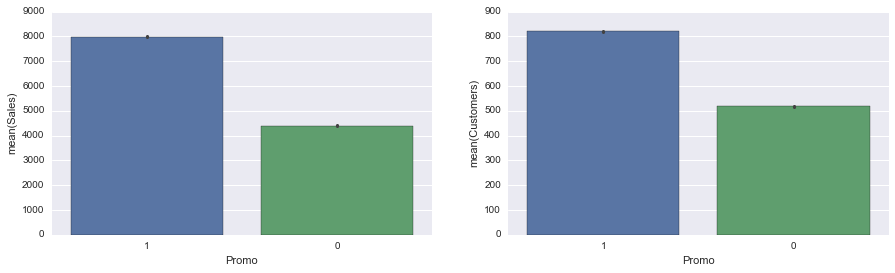

In [4]:
# Plot average sales & customers with/without promo
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=rossmann_df, ax=axis2)

C:\Users\rvlfl_000\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


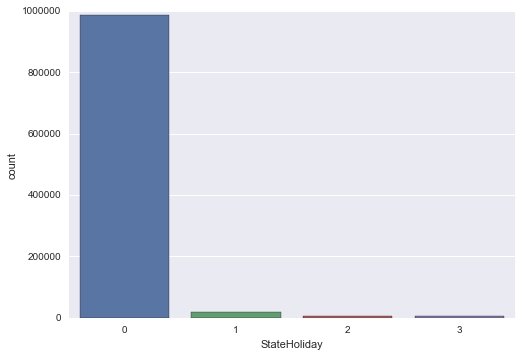

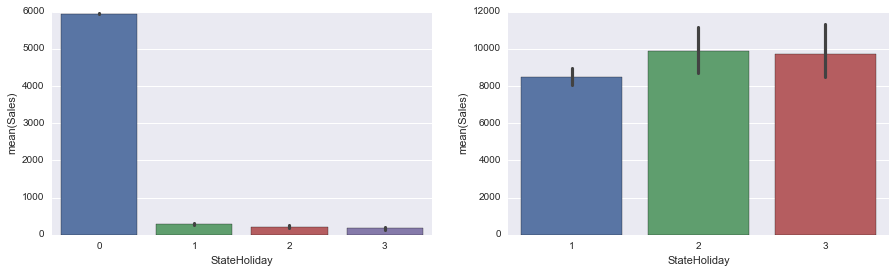

In [20]:

# For the above code, with and without loc give the same result.
# What's the difference between these two?
#print(np.shape(rossmann_df["StateHoliday"][rossmann_df["StateHoliday"] == "a"]))
#print(np.shape(rossmann_df["StateHoliday"].loc[rossmann_df["StateHoliday"] == "a"]))

sns.countplot(x = "StateHoliday", data = rossmann_df)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x = "StateHoliday", y = "Sales", data = rossmann_df, ax = axis1 )

# We want to see the sales on state holidays
# This matrix level boolean operation is cool!
mask = (rossmann_df["StateHoliday"] != 0) & (rossmann_df["Sales"] > 0)

#print(mask)

sns.barplot(x = "StateHoliday", y = "Sales", data = rossmann_df[mask], ax = axis2 )


So there are slight increases of sales and customers on School Holidays

C:\Users\rvlfl_000\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


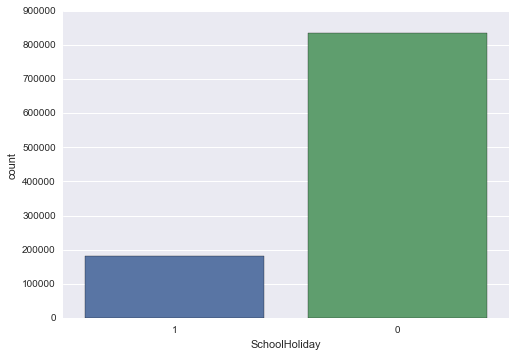

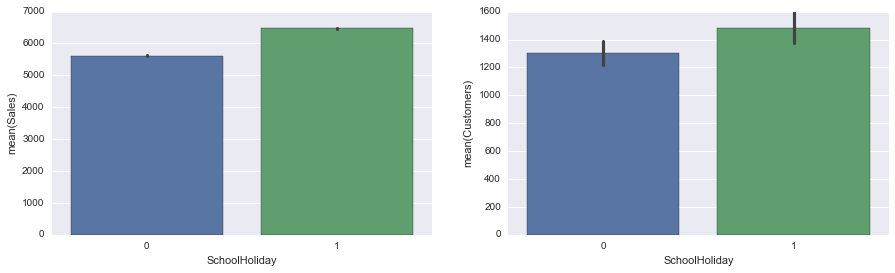

In [23]:
sns.countplot(x = "SchoolHoliday", data = rossmann_df)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x = "SchoolHoliday", y = "Sales", data = rossmann_df, ax = axis1, order = [0, 1] )
sns.barplot(x = "SchoolHoliday", y = "Customers", data = rossmann_df[mask], ax = axis2, order = [0, 1]  )

### Time Series Linear Regression

In [21]:
# Get the sales column for each store


runLinearRegression = True
runTimeSeriesLinearRegression = False

# TODO: understand this
rossmann_dic = dict(list(rossmann_df.groupby('Store')))
test_dic     = dict(list(test_df.groupby('Store')))

#print(test_dic)

for i in test_dic:

    store = rossmann_dic[i]
    
    
    # I guess here, axis=1 refers to columns
    X_train = store.drop(["Sales","Store"], axis =1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    
    # Time Series - Linear Regression
    
    if runTimeSeriesLinearRegression:
        _X_train = []
        _X_test = []
        
        # TODO: We can probably get rid of these for loops by shifting the list and then build a
        # new dataframe as the X_train
        
        Y_list = list(Y_train)
        for i in range(0, len(Y_list) - 7):
            row = []
            for j in range(i + 1, i + 8):
                row.append(Y_list[j])
            _X_train.append(row)
        lreg = LinearRegression()
        lreg.fit(_X_train, Y_list[0:len(Y_list) - 7])

        #print(lreg.intercept_)
        #break

        pred_Y = []

        for i in range(0, len(X_test.index)):
            pred = 0
            for j in range(i - 7, i):
                v = None
                coef = lreg.coef_[j - i + 7]
                if j < 0:
                    pred += Y_list[abs(j) - 1] * coef
                else:
                    pred += pred_Y[j] * lreg.coef_[0] * coef
            pred += lreg.intercept_
            pred_Y.append(pred)
        print(pred_Y)
        break

    # Linear Regression
    
    if runLinearRegression:
        lreg = LinearRegression()
        lreg.fit(X_train, Y_train)
        Y_pred = lreg.predict(X_test)
        scores.append(lreg.score(X_train, Y_train))
        
# Build a regression

ValueError: could not convert string to float: '2013-01-01'

### Competition

numNoComp = 3


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN
5,6,a,a,310,12,2013,0,NaN,NaN,NaN
6,7,a,c,24000,4,2013,0,NaN,NaN,NaN
7,8,a,a,7520,10,2014,0,NaN,NaN,NaN
13,14,a,a,1300,3,2014,1,40,2011,"Jan,Apr,Jul,Oct"


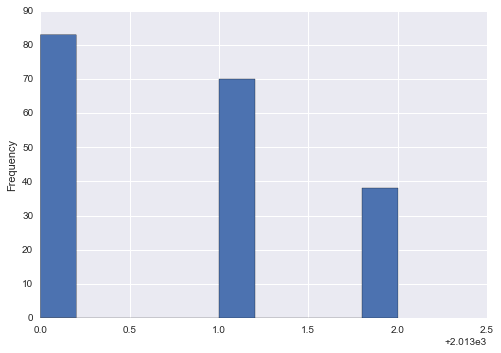

In [57]:
# How many stores have a competitor nearby?
# Only 3. So I guess these are missing values, rather than no competitor
numNoComp = len(store_df.loc[np.isnan(store_df['CompetitionDistance'])].index)
print("numNoComp = " + str(numNoComp))

# fill NaN values
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median())

# Plot CompetitionDistance Vs Sales
# store_df.sort_values(by = 'CompetitionDistance') \
#                    .plot(kind='bar', y = 'CompetitionDistance', figsize=(15,4))
    
store_df.sort_values(by = 'CompetitionDistance')['CompetitionDistance'].describe()

# In which years did the competitors open?
# So roughly 200 stores are opened after 2013.
store_df.loc[store_df["CompetitionOpenSinceYear"] >= 2013]["CompetitionOpenSinceYear"].plot(kind='hist')

display(store_df.loc[store_df["CompetitionOpenSinceYear"] >= 2013].head())

### Competition - Individual Store

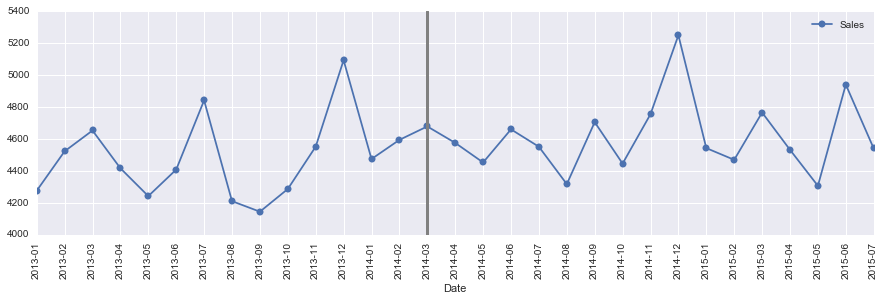

In [58]:
# What happened to the average sales of a store over time when competition started?
# Example: the average sales for store_id = 6 has dramatically decreased since the competition started

store_id = 14
store_data = rossmann_df[rossmann_df["Store"] == store_id]

average_store_sales = store_data.groupby('Date')["Sales"].mean()

# Get year, and month when Competition started
y = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
m = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

# Plot 
ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

# Since all data of store sales given in rossmann_df starts with year=2013 till 2015,
# So, we need to check if year>=2013 and y & m aren't NaN values.
if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')